# Compare replication methods

This notebook compares the different parameter extraction methods.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from typing import Dict
from simreaduntil.shared_utils.merge_axes import compare_axes, copy_axis_props, copy_line
from simreaduntil.shared_utils.plotting import make_tight_layout
from simreaduntil.shared_utils.utils import dill_load, get_some_value_from_dict


In [2]:
def merge_axes_into_one(named_axes: Dict[str, plt.Axes]):
    """
    Combine figures into one axis
    
    Args:
        named_axes: dict of axes, with names as keys, names will be used as labels in legend
    """
    
    fig, ax = plt.subplots()
    copy_axis_props(get_some_value_from_dict(named_axes), ax)
    axes_diffs = compare_axes(*named_axes.values())
    if len(axes_diffs) > 0:
        print(f"Axes are not compatible: {axes_diffs}")
    [copy_line(ax1.get_lines()[0], ax=ax, color=None, label=name) for (name, ax1) in named_axes.items()]
    ax.legend()
    ax.autoscale()
    make_tight_layout(ax.figure)

    return fig

# base_dir = Path("/Volumes/mmordig/ont_project/runs/run_replication/runs/run_replication")
base_dir = Path("/Users/maximilianmordig/ont_project_all/figures_cluster/runs/run_replication")
figure_dirs = {
    "original run": base_dir / "zymo_realrun_plots/figures/pickled_figures",
    "rolling_window_per_channel": base_dir / "sampler_per_rolling_window_channel/simulator_run/figures/pickled_figures",
    "gap_replication": base_dir / "replication/simulator_run/figures/pickled_figures",
    "window_all_channels": base_dir / "sampler_per_window/simulator_run/figures/pickled_figures",
    "constant_gaps": base_dir / "constant_gaps/simulator_run/figures/pickled_figures",
}


/Users/maximilianmordig/ont_project_all/ont_project_venv/lib/python3.10/site-packages/dill/_dill.py:442: UserWarning: This figure was saved with matplotlib version 3.8.0 and is unlikely to function correctly.
  obj = StockUnpickler.load(self)


Axes are not compatible: {'title': {'Number of active channels over time (486 active channels)', 'Number of reading channels over time (481 active channels)', 'Number of reading channels over time (512 active channels)', 'Number of reading channels over time (486 active channels)'}, 'ylabel': {'Number of reading channels', 'Number of active channels'}}


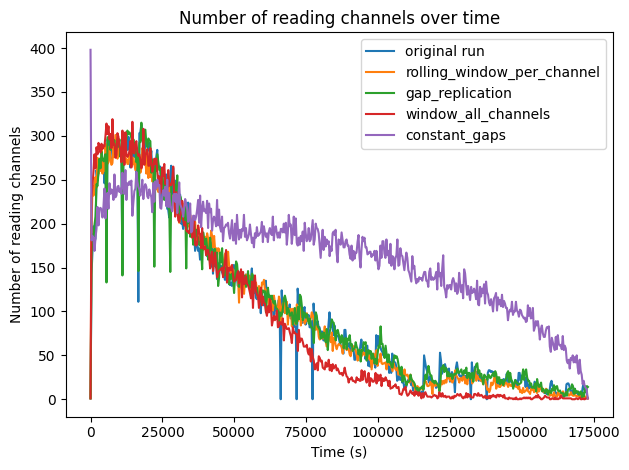

In [3]:
figure_basename = "channel_occupation_fraction_over_time.dill"

figs = {name: dill_load(figure_dir / figure_basename) for name, figure_dir in figure_dirs.items()}
[plt.close(fig) for fig in figs.values()]
named_axes = {name: fig.axes[0] for name, fig in figs.items()}

# # plot number rather than fraction of active channels
# for original_ax in named_axes.values():
#     # parse title of the form:
#     # f"Fraction of active channels over time ({n_channels} active channels)"
#     n_channels = int(original_ax.get_title().split("(")[-1].split(" ")[0])
#     line = original_ax.lines[0]
#     print(n_channels)
#     line.set_ydata(np.array(line.get_ydata()) / 100 * n_channels)
# # ax.autoscale()

fig = merge_axes_into_one(named_axes)
ax = fig.axes[0]

ax.set_ylabel("Number of reading channels")
ax.set_title(f"Number of reading channels over time") # number of active channels varies between sequencing runs
fig.savefig(base_dir / "combined_channel_occupation_fraction_over_time.png", dpi=300, bbox_inches="tight")

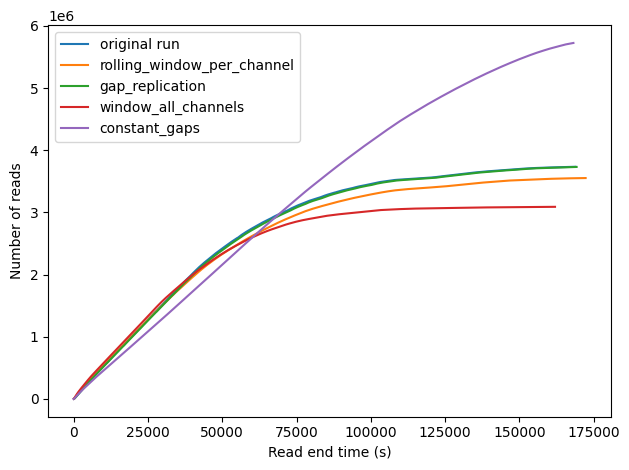

In [4]:
figure_basename = "cum_nb_reads_per_all.dill"

figs = {name: dill_load(figure_dir / figure_basename) for name, figure_dir in figure_dirs.items()}
[plt.close(fig) for fig in figs.values()]
named_axes = {name: fig.axes[0] for name, fig in figs.items()}

fig = merge_axes_into_one(named_axes)
ax = fig.axes[0]

fig.savefig(base_dir / "combined_cum_nb_reads_per_all.png", dpi=300, bbox_inches="tight")

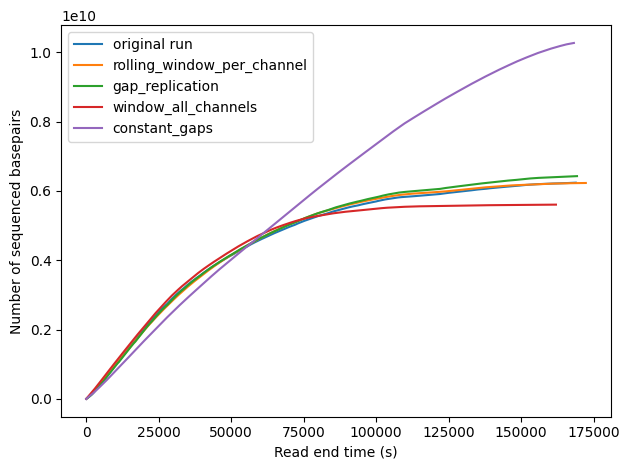

In [5]:
figure_basename = "cum_nb_seq_bps_per_all.dill"

figs = {name: dill_load(figure_dir / figure_basename) for name, figure_dir in figure_dirs.items()}
[plt.close(fig) for fig in figs.values()]
named_axes = {name: fig.axes[0] for name, fig in figs.items()}

fig = merge_axes_into_one(named_axes)
ax = fig.axes[0]

fig.savefig(base_dir / "combined_cum_nb_seq_bps_per_all.png", dpi=300, bbox_inches="tight")

In [6]:
%%bash
set -ex

######## Main Paper

### compare parameter extraction methods

base_dir=/Users/maximilianmordig/ont_project_all/figures_cluster/runs/run_replication/
target_base_dir=/Users/maximilianmordig/ont_project_all/figures_paper/MainPaper/extraction_comparison/

cp "${base_dir}zymo_realrun_plots/figures/read_stats_by_channel.png" "${target_base_dir}read_stats_by_channel_zymo_realrun_plots.png"
cp "${base_dir}sampler_per_rolling_window_channel/simulator_run/figures/read_stats_by_channel.png" "${target_base_dir}read_stats_by_channel_rollingwindow.png"
cp "${base_dir}replication/simulator_run/figures/read_stats_by_channel.png" "${target_base_dir}read_stats_by_channel_replication.png"
cp "${base_dir}sampler_per_window/simulator_run/figures/read_stats_by_channel.png" "${target_base_dir}read_stats_by_channel_sampler_per_window.png"
cp "${base_dir}constant_gaps/simulator_run/figures/read_stats_by_channel.png" "${target_base_dir}read_stats_by_channel_constantgaps.png"

cp "${base_dir}/combined_channel_occupation_fraction_over_time.png" "${target_base_dir}"
cp "${base_dir}/combined_cum_nb_reads_per_all.png" "${target_base_dir}"
cp "${base_dir}/combined_cum_nb_seq_bps_per_all.png" "${target_base_dir}"

### copy enrich usecase
base_dir=/Users/maximilianmordig/ont_project_all/figures_cluster/runs/enrich_usecase/full_genome_run_sampler_per_window/simulator_run/figures/
target_base_dir=/Users/maximilianmordig/ont_project_all/figures_paper/MainPaper/readfish_usecase/
cp "${base_dir}"*.png "${target_base_dir}"

+ base_dir=/Users/maximilianmordig/ont_project_all/figures_cluster/runs/run_replication/
+ target_base_dir=/Users/maximilianmordig/ont_project_all/figures_paper/MainPaper/extraction_comparison/
+ cp /Users/maximilianmordig/ont_project_all/figures_cluster/runs/run_replication/zymo_realrun_plots/figures/read_stats_by_channel.png /Users/maximilianmordig/ont_project_all/figures_paper/MainPaper/extraction_comparison/read_stats_by_channel_zymo_realrun_plots.png
+ cp /Users/maximilianmordig/ont_project_all/figures_cluster/runs/run_replication/sampler_per_rolling_window_channel/simulator_run/figures/read_stats_by_channel.png /Users/maximilianmordig/ont_project_all/figures_paper/MainPaper/extraction_comparison/read_stats_by_channel_rollingwindow.png
+ cp /Users/maximilianmordig/ont_project_all/figures_cluster/runs/run_replication/replication/simulator_run/figures/read_stats_by_channel.png /Users/maximilianmordig/ont_project_all/figures_paper/MainPaper/extraction_comparison/read_stats_by_channel

In [8]:
%%bash

######## Supplement
base_dir=/Users/maximilianmordig/ont_project_all/figures_cluster/runs/
target_base_dir=/Users/maximilianmordig/ont_project_all/figures_paper/Supplementary/
(cd "$base_dir"; find * -type d -name figures -exec bash -c 'filename={}; echo "Converting dir $filename"; convert {}/*.png '${target_base_dir}'${filename//\//__}.pdf' \;)

Converting dir enrich_usecase/full_genome_run_sampler_per_window/simulator_run/figures


Converting dir run_replication/constant_gaps/simulator_run/figures
Converting dir run_replication/sampler_per_window/simulator_run/figures
Converting dir run_replication/zymo_realrun_plots/figures
Converting dir run_replication/replication/simulator_run/figures
Converting dir run_replication/sampler_per_rolling_window_channel/simulator_run/figures
